# Colliding Gravitational Waves by Szekeres Nature Article
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 21, 2022

https://www.nature.com/articles/2281183a0

https://ui.adsabs.harvard.edu/abs/1970Natur.228.1183S/abstract

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,x,y,du,dv,dx,dy = symbols('u v x y du dv dx dy')

In [4]:
M = Function('M')(u,v)
M

In [5]:
U = Function('U')(u,v)
U

In [6]:
V = Function('V')(u,v)
V

In [63]:
f = Function('f')(u)
f

In [64]:
g = Function('g')(v)
g

In [7]:
variables = Matrix([u,v,x,y])
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [8]:
differentials = Matrix([du,dv,dx,dy])
differentials 

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [12]:
lineElement = expand(2*exp(-M)*du*dv - exp(-U)* (exp(V)*dx**2 + exp(-V)*dy**2 ))
lineElement

In [13]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            -M(u, v)                                           ⎤
⎢    0      ℯ                   0                    0          ⎥
⎢                                                               ⎥
⎢ -M(u, v)                                                      ⎥
⎢ℯ              0               0                    0          ⎥
⎢                                                               ⎥
⎢                        -U(u, v)  V(u, v)                      ⎥
⎢    0          0      -ℯ        ⋅ℯ                  0          ⎥
⎢                                                               ⎥
⎢                                             -U(u, v)  -V(u, v)⎥
⎣    0          0               0           -ℯ        ⋅ℯ        ⎦

In [14]:
import sympy

In [15]:
m = sympy.Array(g)
m

⎡            -M(u, v)                                           ⎤
⎢    0      ℯ                   0                    0          ⎥
⎢                                                               ⎥
⎢ -M(u, v)                                                      ⎥
⎢ℯ              0               0                    0          ⎥
⎢                                                               ⎥
⎢                        -U(u, v)  V(u, v)                      ⎥
⎢    0          0      -ℯ        ⋅ℯ                  0          ⎥
⎢                                                               ⎥
⎢                                             -U(u, v)  -V(u, v)⎥
⎣    0          0               0           -ℯ        ⋅ℯ        ⎦

In [16]:
from einsteinpy.symbolic import *

In [17]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [18]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                                      
⎢⎡ ∂                                                                                                                                   
⎢⎢-──(M(u, v))  0                              0                                                           0                           
⎢⎢ ∂u                                                                                                                                  
⎢⎢                                                                                                                                     
⎢⎢     0        0                              0                                                           0                           
⎢⎢                                                                                                                                     
⎢⎢                 ⎛  ∂             ∂          ⎞

In [20]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                             2                               2                                                        
⎢                                ⎛∂          ⎞                   ⎛∂          ⎞            ∂           ∂             ∂           ∂      
⎢                                ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟            ──(U(u, v))⋅──(U(u, v))   ──(V(u, v))⋅──(V(u,
⎢      ∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠            ∂u          ∂v            ∂u          ∂v     
⎢      ──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────         - ─────────────────────── - ───────────────────
⎢      ∂u          ∂u                  2            2                  2                             2                         2       
⎢                                                 ∂u                                                                                   
⎢                                               

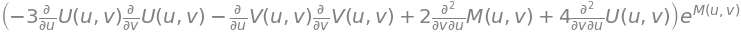

In [21]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [22]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                       2                               2                                                              
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                                                               
⎢                          ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟                                                  2            
⎢∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                     ∂           ∂               ∂             
⎢──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────                1.0⋅──(U(u, v))⋅──(U(u, v)) - ─────(U(u, v))  
⎢∂u          ∂u                  2            2                  2                           ∂u          ∂v            ∂v ∂u           
⎢                                           ∂u                                                                                         
⎢                                               

In [23]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [24]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [25]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                             2                               2                                                        
⎢                                ⎛∂          ⎞                   ⎛∂          ⎞            ∂           ∂             ∂           ∂      
⎢                                ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟            ──(U(u, v))⋅──(U(u, v))   ──(V(u, v))⋅──(V(u,
⎢      ∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠            ∂u          ∂v            ∂u          ∂v     
⎢      ──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────         - ─────────────────────── - ───────────────────
⎢      ∂u          ∂u                  2            2                  2                             2                         2       
⎢                                                 ∂u                                                                                   
⎢                                               

In [26]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                       2                               2                                                              
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                                                               
⎢                          ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟                                                  2            
⎢∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                     ∂           ∂               ∂             
⎢──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────                1.0⋅──(U(u, v))⋅──(U(u, v)) - ─────(U(u, v))  
⎢∂u          ∂u                  2            2                  2                           ∂u          ∂v            ∂v ∂u           
⎢                                           ∂u                                                                                         
⎢                                               

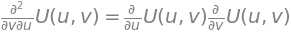

In [29]:
equation5 = Eq(diff(U,u,v), solve( einsteinSimplified[1,0], diff(U,u,v) )[0] ) 
equation5

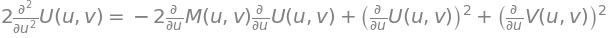

In [59]:
equation6 = Eq(2*diff(U,u,u), 2*solve( einsteinSimplified[0,0], diff(U,u,u) )[0] ) 
equation6

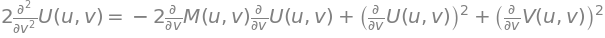

In [58]:
equation7 = Eq(2*diff(U,v,v), 2*solve( einsteinSimplified[1,1], diff(U,v,v) )[0] ) 
equation7 

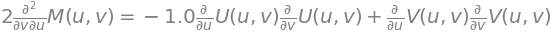

In [57]:
equation8 = Eq(2*diff(M,u,v), 2*solve( ( einsteinSimplified[2,2].args[0] + einsteinSimplified[3,3].args[0] ).subs(equation5.lhs,equation5.rhs) , diff(M,u,v) )[0] )
equation8

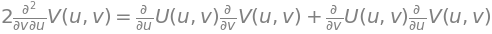

In [60]:
equation9 = Eq(2*diff(V,u,v), 2*solve( ( einsteinSimplified[2,2].args[0] - einsteinSimplified[3,3].args[0] ), diff(V,u,v) )[0] ) 
equation9

In [62]:
vacuumFieldEquations = Matrix([equation5,equation6,equation7,equation8,equation9])
vacuumFieldEquations

⎡                      2                                                       ⎤
⎢                     ∂              ∂           ∂                             ⎥
⎢                   ─────(U(u, v)) = ──(U(u, v))⋅──(U(u, v))                   ⎥
⎢                   ∂v ∂u            ∂u          ∂v                            ⎥
⎢                                                                              ⎥
⎢    2                                                       2                2⎥
⎢   ∂                 ∂           ∂             ⎛∂          ⎞    ⎛∂          ⎞ ⎥
⎢2⋅───(U(u, v)) = - 2⋅──(M(u, v))⋅──(U(u, v)) + ⎜──(U(u, v))⎟  + ⎜──(V(u, v))⎟ ⎥
⎢    2                ∂u          ∂u            ⎝∂u         ⎠    ⎝∂u         ⎠ ⎥
⎢  ∂u                                                                          ⎥
⎢                                                                              ⎥
⎢    2                                                       2                2⎥
⎢   ∂                 ∂     

In [65]:
equation9a = Eq(U, - log(f+g))
equation9a

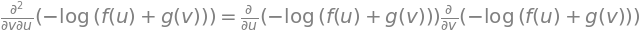

In [66]:
equation5.subs(equation9a.lhs,equation9a.rhs)

In [67]:
equation5.subs(equation9a.lhs,equation9a.rhs).doit()

True